_Dicslaimer : Install Scikit-Learn 0.24.1 for this notebook_

# Bank Campaign Prediction
---


## Introduction
Author : Hafidzati Hikmadani <br>


## Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from poin 1, and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In this notebook we will use dataset number 3 and 4 for modeling purpose.

## Attribute Information:

Input variables:

__bank client data:__
1. age (numeric)<br>
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") <br>
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
4. education (categorical: "unknown","secondary","primary","tertiary")<br>
5. default: has credit in default? (binary: "yes","no")<br>
6.  balance: average yearly balance, in euros (numeric) <br>
7. housing: has housing loan? (binary: "yes","no")<br>
8. loan: has personal loan? (binary: "yes","no")<br>

__related with the last contact of the current campaign:__
9. contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
10. day: last contact day of the month (numeric)<br>
11.  month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
12. duration: last contact duration, in seconds (numeric)<br>

__other attributes:__
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
15.  previous: number of contacts performed before this campaign and for this client (numeric)<br>
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

__Output variable (desired target):__
17. y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

You could download dataset from [here](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).<br>


## Goals

1. How much percentage of successful campaign in dataset?
2. Does client's balance affecting the successfull of customer?
3. Which contact method do produce the highest successfull campaign? How duration is going?
4. Which ccustomer's job who has highest succesfull campaign?
5. Does customer who has loan (housing, loans or credit) tend to reject the campaign promotion?
6. Create a model which could predict if the client will subscribe a term deposit or not (variable y).

## Import Library

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier , BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,precision_score
import joblib

## Data Loading

In [4]:
#Load data
data = pd.read_csv("bank-full.csv" , sep=";")

In [5]:
#Privew spoiler of data
pd.set_option('display.max_columns', None) #to shown all the columns 
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [6]:
#Daset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In dataset, we have 17 attributes devided by 7 numerical attributes and 10 categoric attributes.

In [7]:
#Show total row and attributes
data.shape

(45211, 17)

We have 45.211 rows of data.

## Data Cleaning

Let's copy the data first for cleaning processes.

In [8]:
#Copy data
df= data.copy()

In [9]:
#Find out missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no null value in this dataset.
Recalling on dataset information, it's stated there are some attributes who has unknown value. This will be treated as new class in this notebook an any missing values of categorical /numerical data will be fill up with the mode of the data.

## Data Visualization

### Distribution of Numeric Attributes

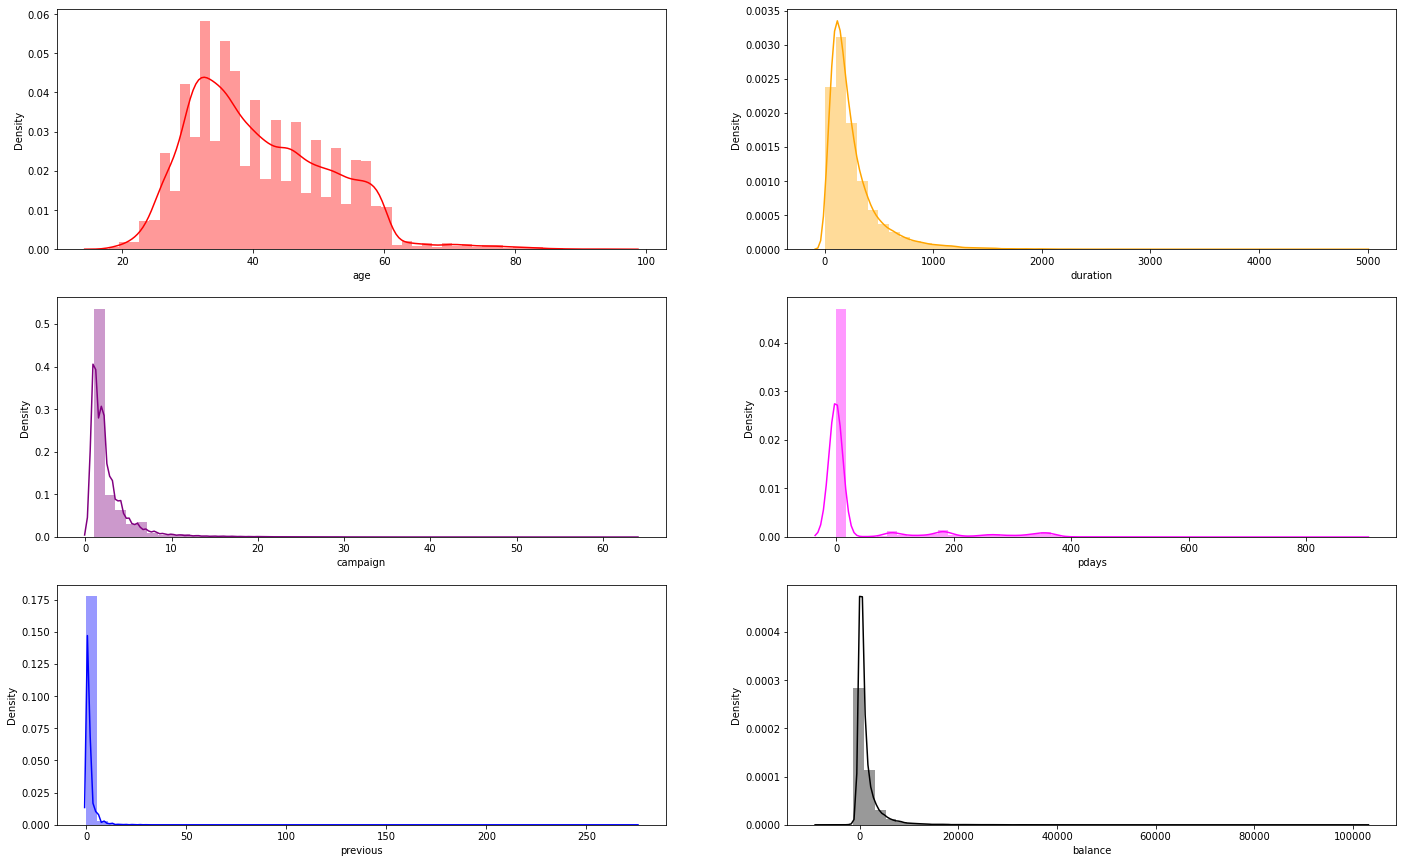

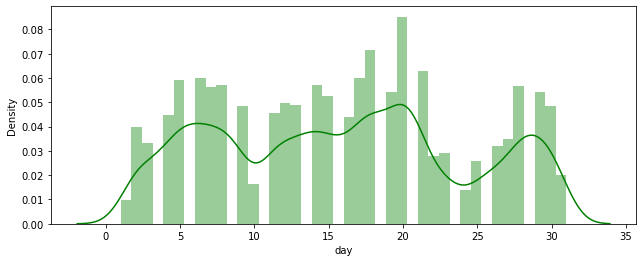

In [10]:
# Distribution of numerical data
attr_num = df[['age', 'balance' , 'duration', 'campaign', 'pdays', 'previous', 'day']]

#Graph
warnings.simplefilter(action='ignore', category=FutureWarning)
fig , ax = plt.subplots(3,2, figsize=(24,15))

sns.distplot(attr_num['age'], ax=ax[0,0], color='red');
sns.distplot(attr_num['duration'], ax=ax[0,1], color='orange');
sns.distplot(attr_num['campaign'], ax=ax[1,0], color='purple');
sns.distplot(attr_num['pdays'], ax=ax[1,1], color='magenta');
sns.distplot(attr_num['previous'], ax=ax[2,0], color='blue');
sns.distplot(attr_num['balance'], ax=ax[2,1], color='black');
plt.show()

plt.figure(figsize=(10.5,4))
sns.distplot(attr_num['day'],color='green');
plt.show()

From above histogram we could get some information :

1. Range of age that contacted for campaign is start from 20 until 100 years old..
2. Duration hapening in calling/contacting customer start from 0 seconds unrtil 5000 seconds. Means there were a call that lasted for almost 1,5 hour for a campaign. We could check this data later.
3. There are a customer who's been conctacted almost 60 times.
4. Mostly, customer havent been contacted for any previous campaign because pday has high value around -1 . While there is also some just been contacted after 900 days.
5. Mostly customers haven't been contacted any campagin before.
6. Yearly balance distribution of customer contacted range from minus value until 100.000 euro. 
7. Day has almost normal distribution , it reperesents the date in a month when campaign call happened.
8. Almost of attributes have long right skewed except day, means all attributes is not normal distribution. These data has high variance of data but it mostly grouped in one side online.

Now let's find out the how the data distributed each other in numerical attributes.

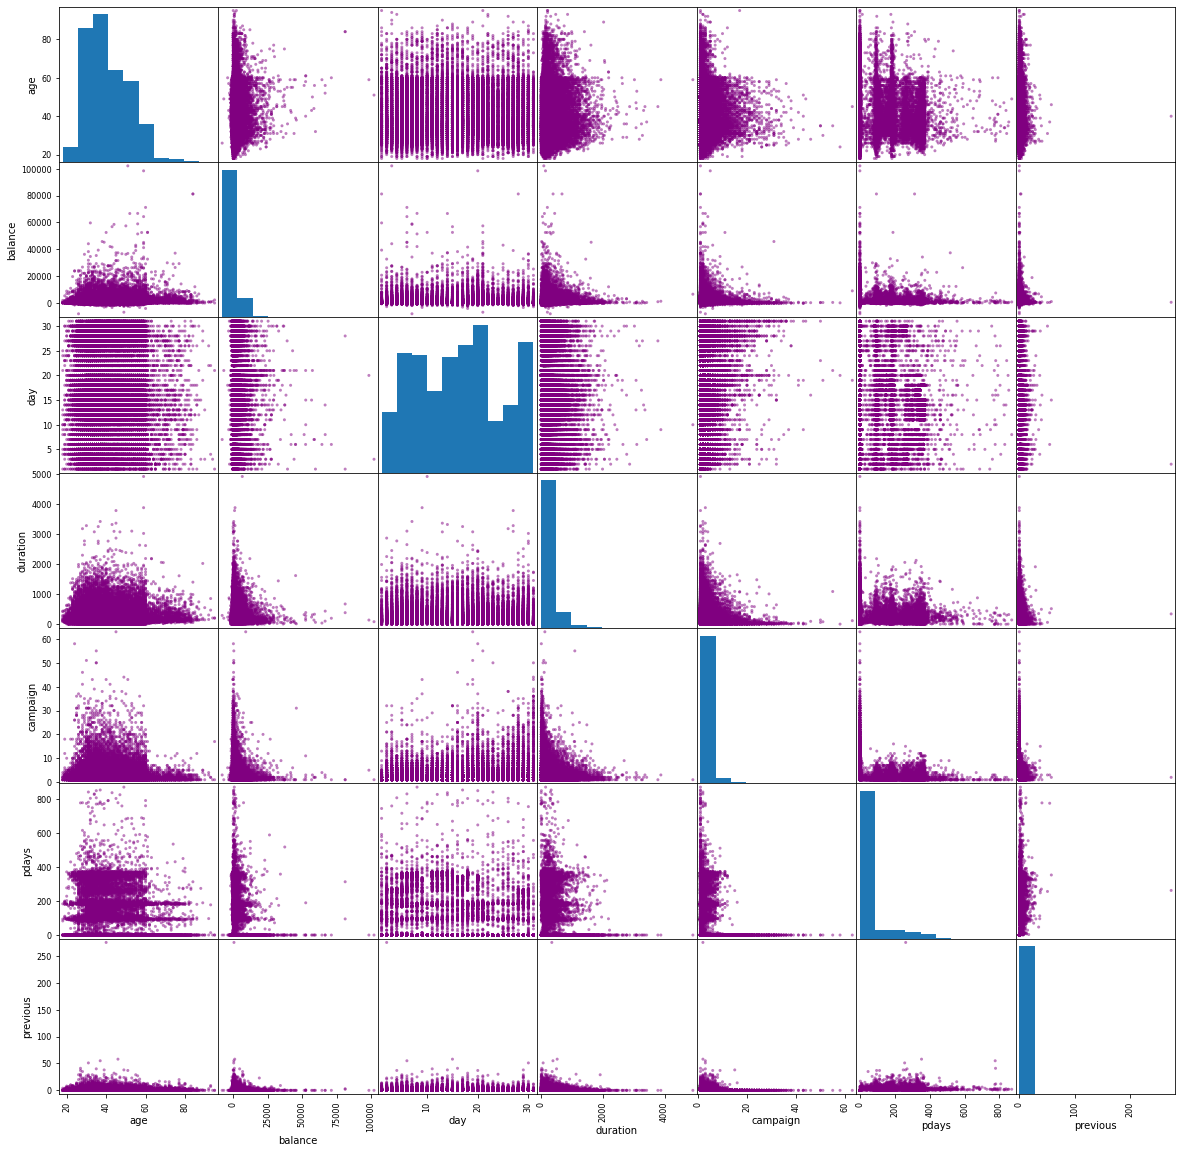

In [11]:
#Graph scatter matrix for numerical attribute

attributes = df.select_dtypes(exclude="object").columns
scatter_matrix(df[attributes], figsize=(20, 20) ,color="purple")
plt.show()

From above scatter matrix, we could see that numerical attributes doesn't have strong correlation (mutually exclusive) each other since there is no graph who has exponent looks like form.

### Distribution of Categorical Attributes

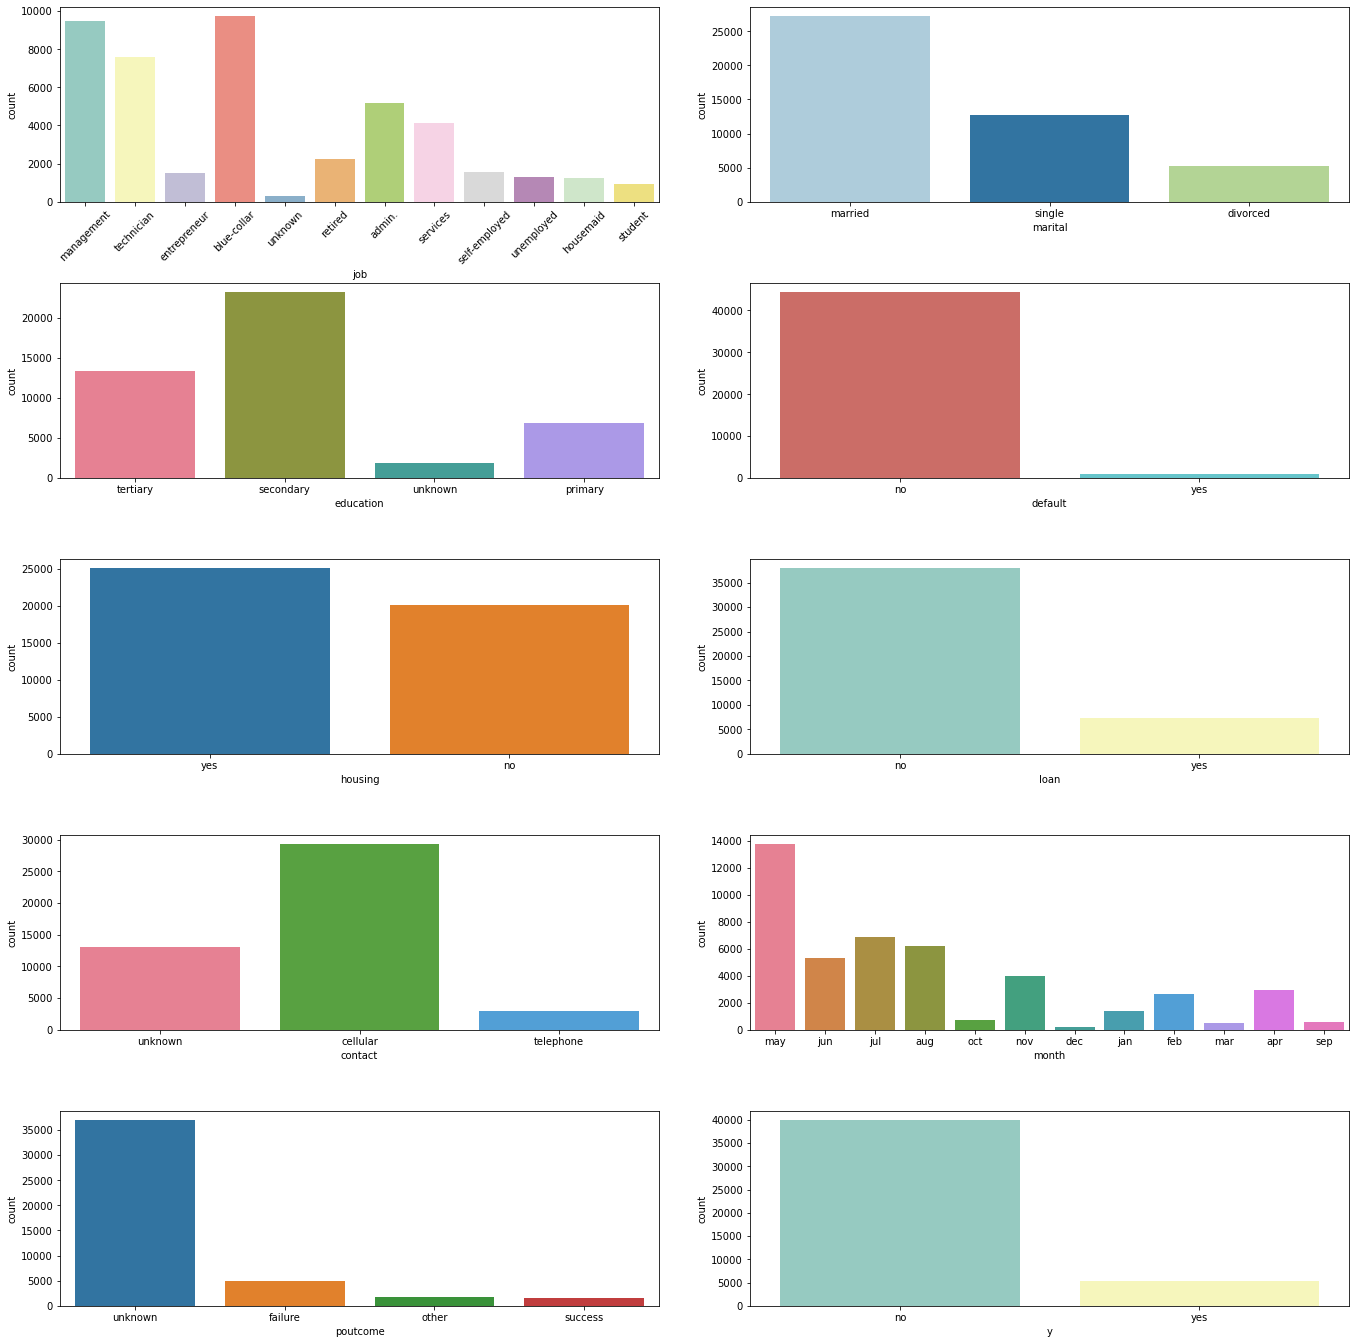

In [12]:
# Distribution of categorical data
attr_cat = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y']]

#Graph
warnings.simplefilter(action='ignore', category=FutureWarning)
fig , ax = plt.subplots(5,2, figsize=(20,20))
fig.tight_layout(pad=6.0)


sns.countplot(data=attr_cat, x="job", ax=ax[0,0], palette="Set3").tick_params(axis='x', labelrotation=45)
sns.countplot(data=attr_cat, x="marital", ax=ax[0,1], palette="Paired");
sns.countplot(data=attr_cat, x="education", ax=ax[1,0], palette="husl");
sns.countplot(data=attr_cat, x="default", ax=ax[1,1], palette="hls");
sns.countplot(data=attr_cat, x="housing", ax=ax[2,0], palette="tab10");
sns.countplot(data=attr_cat, x="loan", ax=ax[2,1], palette="Set3");
sns.countplot(data=attr_cat, x="contact", ax=ax[3,0], palette="husl");
sns.countplot(data=attr_cat, x="month", ax=ax[3,1], palette="husl");
sns.countplot(data=attr_cat, x="poutcome", ax=ax[4,0], palette="tab10");
sns.countplot(data=attr_cat, x="y", ax=ax[4,1], palette="Set3");


From above bar plot, we could get some information :
1. The most often contacted for the campaign is the people with blue-collar and management jobs.
2. Campaign calling is mostly happened to customer on May.
3. Most of previous campaign resulting unknown outcome which could be bank's consideration.
4. Most of current campaign are resulting "No" for subcribing the term of deposit.
5. We have unknown value in job, education, contact and poutcome that will be identfied again later.
6. We have boolean data of loan, housing and default (credit).
7. Most of customer contacted of campaign has secondary education.

### Data Visualization

__Portion of client who subscribe the deposit term in dataset__

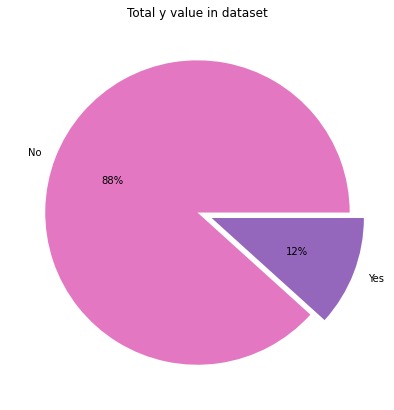

In [13]:
#Graph
qr1= df.groupby("y")['age'].count().reset_index()

plt.figure(figsize=(7,7))
plt.pie(qr1['age'] ,labels=["No" , "Yes"], autopct='%.0f%%', explode=[0,0.1], colors=['tab:pink','tab:purple'])
plt.title("Total y value in dataset")
plt.show()

We have 12% client who subcribe the campaign deposit term in dataset.

__How Balance Affecting the result of campaign__

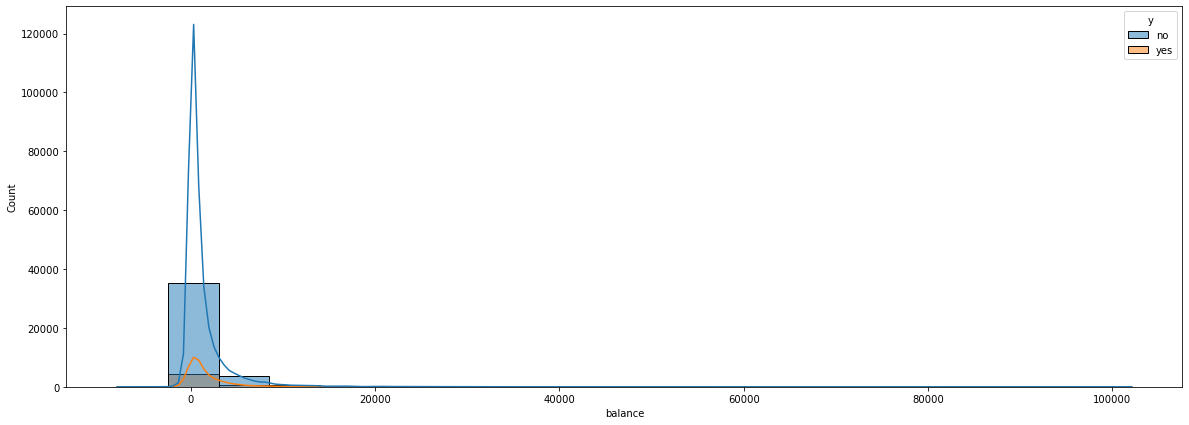

In [14]:
#Graph
plt.figure(figsize=(20,7))
sns.histplot(data=df, x="balance", hue="y", kde= True,  stat='count', bins=20);

Based on trend, there might no relationship between balance client with the result of campagin. It's proven by the graph which tell us even customer with minus balance still could subsribce the deposit term campaign.

__Which contact media is having the highest yes result in campaign__

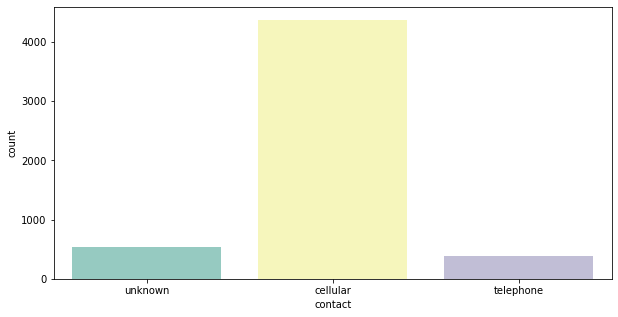

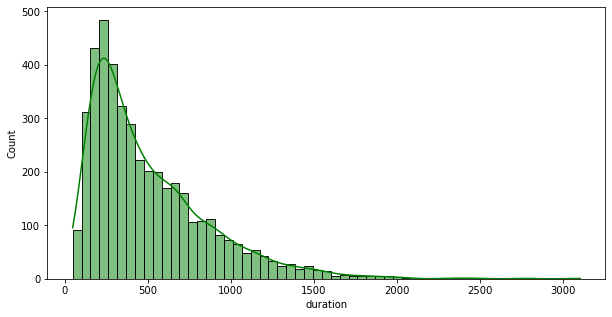

In [15]:
#Graph
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['y']=='yes'], x="contact",  palette="Set3")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df[(df['y']=='yes') & (df['contact'] == "cellular")], x="duration", kde= True , color="green");
plt.show()

The most success campaign is done by cellular contact with the range of durration call vary from aroun 40 seconds until 3500 seconds

__What kind of Client's Job who is sucessfull most for campaign__

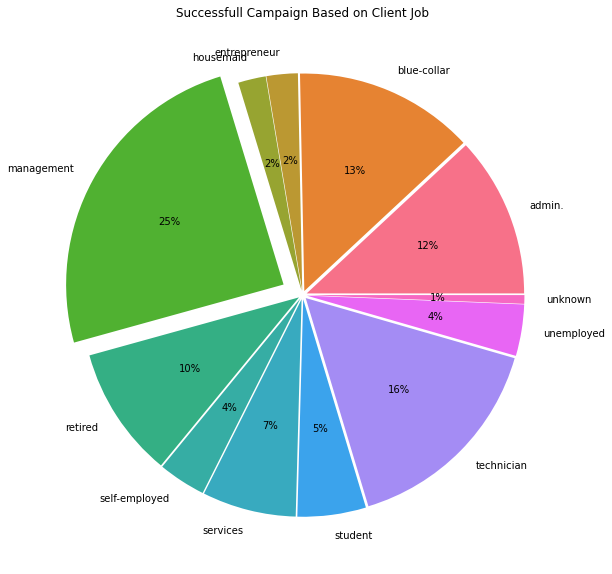

In [16]:
#Graph
qr2= df[df['y']=="yes"].groupby("job")['y'].count().reset_index()
explode= [0.02,0.02,0.02,0.02,0.1,0.02,0.02,0.02,0.02,0.02,0.02,0.02]
color= sns.color_palette("husl", 12)

plt.figure(figsize=(10,10))
plt.pie(qr2['y'] ,labels=qr2['job'], autopct='%.0f%%', explode=explode, colors=color)
plt.title("Successfull Campaign Based on Client Job")
plt.show()

The most sucessfull campaign is happening with client who has job as management (25% of dataset)and followed the second position is technician.

__Doest client who has loan (housing,loand or credit) tend to subcsribe the campaign__

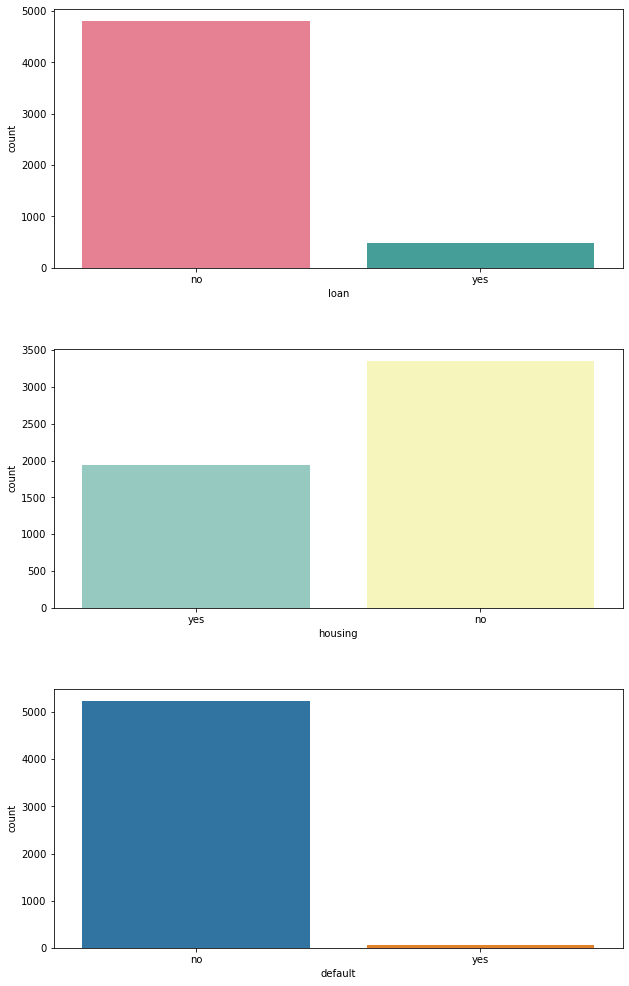

In [17]:
#Graph
fig , ax = plt.subplots(3,1, figsize=(10,15))
fig.tight_layout(pad=6.0)

sns.countplot(data=df[df['y']=='yes'], x="loan", ax=ax[0],  palette="husl")
sns.countplot(data=df[df['y']=='yes'], x="housing", ax=ax[1],  palette="Set3")
sns.countplot(data=df[df['y']=='yes'], x="default", ax=ax[2], palette="tab10")
plt.show()

We could see, mostly client who has credit and loan tend to not subscribe the campaign, while the customer who has housing loan can be consider to be successfull campaign target.

__Others Visualization__

Since there is some unknown value, let's find out how is y result against any unknown value.

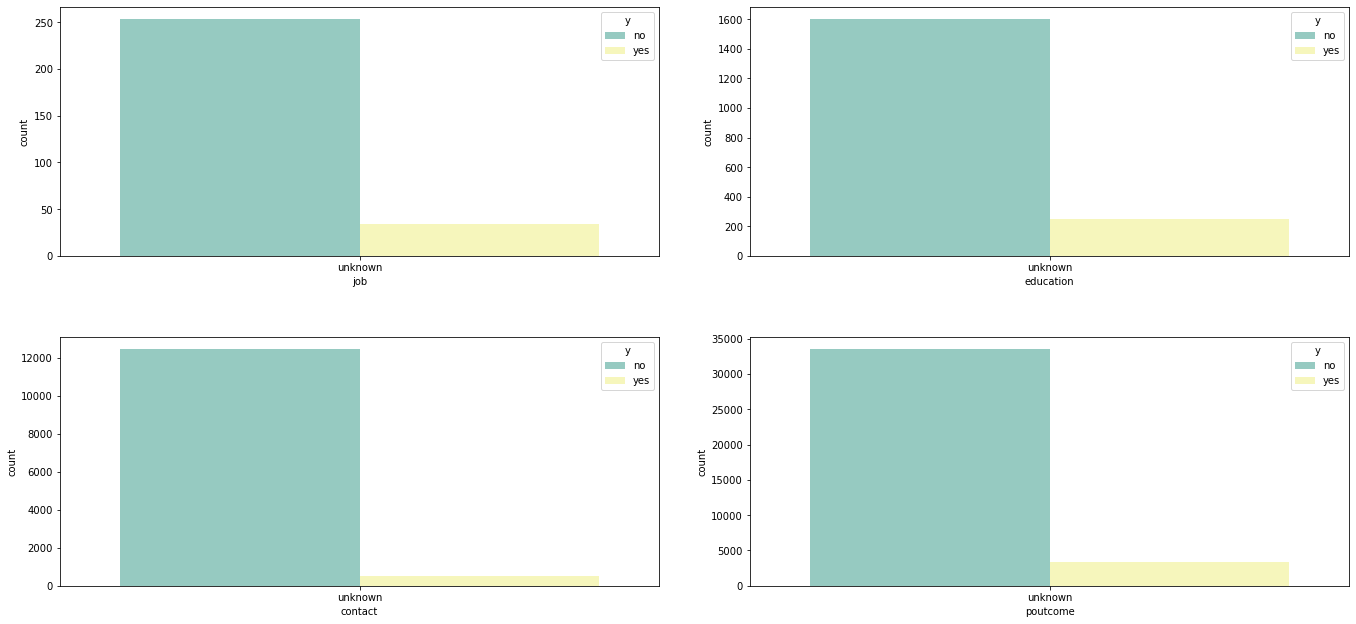

In [18]:
#Query
q1 = df[df['job'] == "unknown"][['job','y']]
q2 = df[df['education'] == "unknown"][['education','y']]
q3 = df[df['contact'] == "unknown"][['contact','y']]
q4 = df[df['poutcome'] == "unknown"][['poutcome','y']]

#Graph
#warnings.simplefilter(action='ignore', category=FutureWarning)
fig , ax = plt.subplots(2,2, figsize=(20,10))
fig.tight_layout(pad=6.0)


sns.countplot(data=q1, x="job", ax=ax[0,0], hue="y" , palette="Set3")
sns.countplot(data=q2, x="education", ax=ax[0,1], hue="y" , palette="Set3")
sns.countplot(data=q3, x="contact", ax=ax[1,0], hue="y" , palette="Set3")
sns.countplot(data=q4, x="poutcome", ax=ax[1,1], hue="y" , palette="Set3")
plt.show()

We're see unknown value in attributes still has some result yes against the term deposit. It means we can't ignore uknown value attributes. It might happened because human error or customer refuse to answer.

Now we're going to find out does customer education , job and loan are affecting the y target.

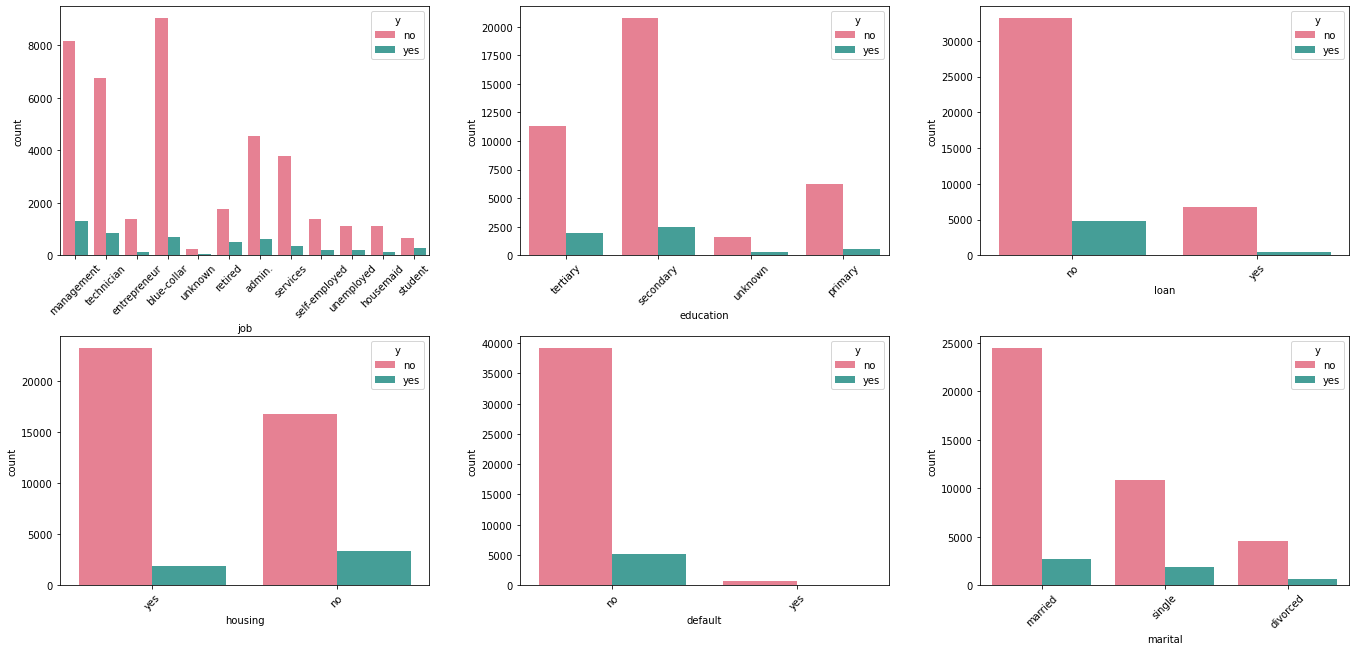

In [19]:
#Graph
#warnings.simplefilter(action='ignore', category=FutureWarning)
fig , ax = plt.subplots(2,3, figsize=(20,10))
fig.tight_layout(pad=6.0)


sns.countplot(data=df, x="job", ax=ax[0,0], hue="y" , palette="husl").tick_params(axis='x', labelrotation=45)
sns.countplot(data=df, x="education", ax=ax[0,1], hue="y" , palette="husl").tick_params(axis='x', labelrotation=45)
sns.countplot(data=df, x="loan", ax=ax[0,2], hue="y" , palette="husl").tick_params(axis='x', labelrotation=45)
sns.countplot(data=df, x="housing", ax=ax[1,0], hue="y" , palette="husl").tick_params(axis='x', labelrotation=45)
sns.countplot(data=df, x="default", ax=ax[1,1], hue="y" , palette="husl").tick_params(axis='x', labelrotation=45)
sns.countplot(data=df, x="marital", ax=ax[1,2], hue="y" , palette="husl").tick_params(axis='x', labelrotation=45)

plt.show()

We could see some information :
1. Eventhough campaign calling is happening to blue-collar customer, but most of customer who has management as job mostly accept the deposit term.
2. Most of secondary educated customer, accept the deposit term.
3. Mostly customer who has loan, or has housing loan didn't accept the deposit term.
4. Most of customer who doesn't have credit, tend to accept the deposit.
5. Married customer tend to accept deposit too.

We can conclude, mostly customer who has loan won't interest in deposit and customer has background in management might more understand about benefit of deposit that's why almost of them accept it.

## Data PreProcessing

In [20]:
# to make this notebook's output identical at every run
np.random.seed(42)

### Split Data

For our modelling, we will use 2 type of split data : 
1. split the data become train set, evaluation set with proportion 80% of dataset become train set.
2. All train dataset also will be used as cross validation data.

In [21]:
#split data to train ,test and sample
train_df , eval_df = train_test_split(df, test_size=0.2, random_state=42,  shuffle=True , stratify=df['y'])

train_df = train_df.reset_index(drop=True)
eval_df = eval_df.reset_index(drop=True)

print("Total of training data   : ", train_df.shape[0])
print("Total of evaluation data : ", eval_df.shape[0])


#Split every data from it's feature 
X_train = train_df.drop("y", axis=1) # drop labels for training set
y_train = train_df['y'].copy()

X_eval = eval_df.drop("y", axis=1) # drop labels for training set
y_eval = eval_df['y'].copy()

Total of training data   :  36168
Total of evaluation data :  9043


Since we had set split data using stratify, we now has same proportion of target y in train or eval test like a graph below.

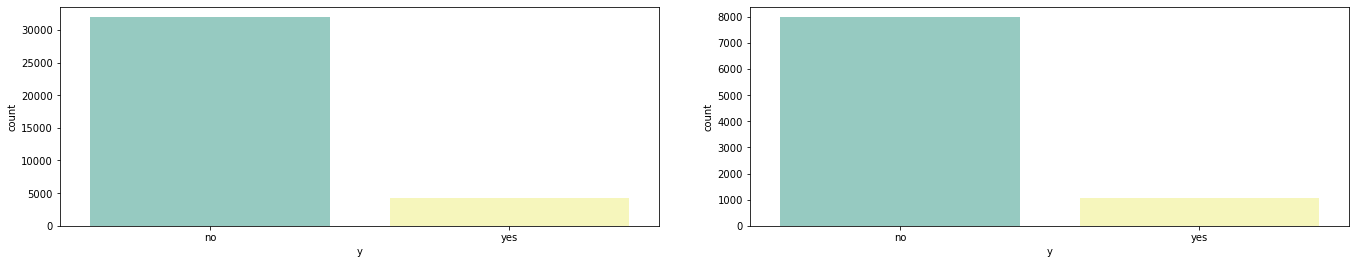

In [22]:
#Graph
warnings.simplefilter(action='ignore', category=FutureWarning)
fig , ax = plt.subplots(1,2, figsize=(20,5))
fig.tight_layout(pad=6.0)

sns.countplot(data=train_df, x="y", ax=ax[0], palette="Set3");
sns.countplot(data=eval_df, x="y", ax=ax[1], palette="Set3");

### Feature Selection

For feature selection, we will divide it into 2 group :
1. We will use correlation / heatmap to find correlation between numerical features with target variable.
2. We will use SelectKBest with chi2 square approach to find out correlation between categorical features with target variable

Our target data is y which represents either customer subscribe campaign or not and features is the rest attributes.

#### Numerical Features

Below, we will find out correlation between the numerical feature against our target y using correlation value approach.

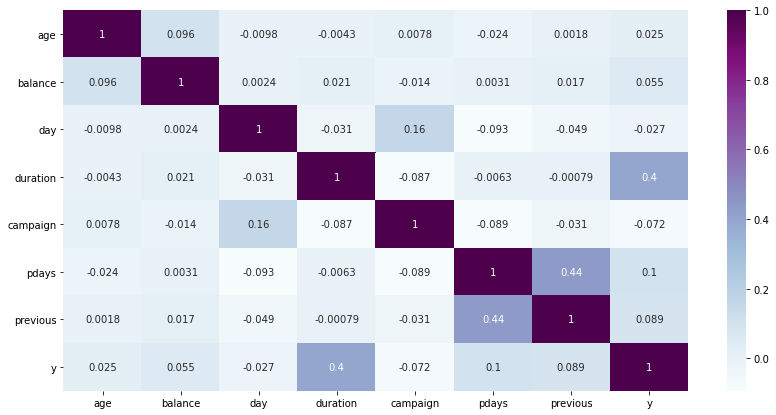

In [23]:
#Numerical Feature Selection

#Encode y value into binary since for correlation calculation we need using numeric value
y_train_num = pd.Series((1 if y_train == "yes" else 0 for y_train in y_train) ,name="y")

#Correlation calculation
feat_num = pd.concat([X_train.select_dtypes(exclude="object"), y_train_num], axis=1)
corr_num = feat_num.corr()

#Graph
plt.figure(figsize=(14,7))
sns.heatmap(corr_num,cmap="BuPu",annot=True);
plt.show()

From above, we decide to focus on feature which has high correlation with y :
1. duration
2. pdays
3. previous

Now let's take a deep analysis against those features.

__Duration Feature__

Recalling attributes of duration, it's an attribute which describe how long bank is contacting customer in current contact for campagin. If duration = 0 , it must be the bank is failed to contact customer and the result of y indeed No.

For our prediction, we won't use this kind of data and will drop it. Let's check if we have 0 value in duration.

In [24]:
print(X_train[X_train['duration'] == 0].shape[0]," data from ", X_train.shape[0], " data")

2  data from  36168  data


We have 2 of them in dataset, this condition will be input in our data cleaning pipeline later.

__Pdays Feature__

Recalling the description data, pdays number of days that passed by after the client was last contacted from a previous campaign. There is -1 value, means client was not previously contacted.

So let's check our data.

In [25]:
print(X_train[X_train['pdays'] == -1].shape[0]," data from ", X_train.shape[0], " data")

29584  data from  36168  data


Wow we have almost all of dataset with -1 value. Since pdays is a discerte type, we can't have -1 values and also we cannot drop the data row because it's quantity in data set.

So we decide to not use this features in our modeling later.

__Previous Feature__

Recalling the data description, it is number of contacts performed before this campaign and for this client. Let's take a look the histogram again.

count    36168.000000
mean         0.581730
std          2.408766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


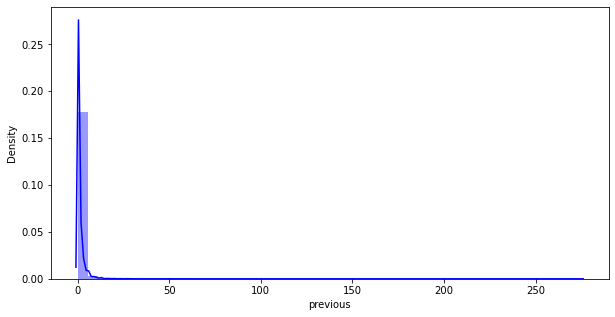

In [26]:

print(X_train['previous'].describe())

plt.figure(figsize=(10,5))
sns.distplot(X_train['previous'], color='blue')
plt.show()

The range value is vary from 0 until 275 and most of data is 0. But in this context we will keep these all data features.

#### Categorical Features

Below, we will find out correlation between the categorical feature against our target y. We will using SelectKBest feature selection with chi2 square approach and pick the highest value to be our model feature.

Feature job : 135.76 
Feature marital : 22.81 
Feature education : 66.98 
Feature default : 21.25 
Feature housing : 310.79 
Feature loan : 134.34 
Feature contact : 973.81 
Feature month : 42.40 
Feature poutcome : 75.44 



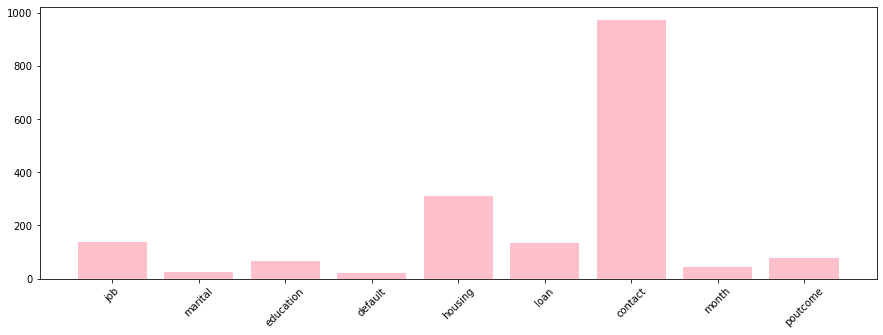

In [27]:
#Define feature encoder 
feat_en = LabelEncoder() #categorical encoder
feat_cat = pd.concat([X_train.select_dtypes(include="object"), y_train], axis=1) 
feat_cats= feat_cat.apply(feat_en.fit_transform) #transform categorical to numeric

#Define Feature Selection with Chi-Square approach
fs_cat = SelectKBest(score_func=chi2, k='all')

#Apply categorical feature selection to Training Data
X_features_cat = fs_cat.fit_transform(feat_cats.drop("y", axis=1), feat_cats['y'])

# what are scores for the features
for col in list(feat_cats.drop("y", axis=1).columns):
  score = fs_cat.scores_[feat_cats.drop("y", axis=1).columns.get_loc(col)]
  print("Feature %s : %.2f " %(col , score))
print("")

#barplot
plt.figure(figsize=(15,5));
plt.bar([col for col in list(feat_cats.drop("y", axis=1).columns)], fs_cat.scores_ , color="pink");
plt.xticks(rotation=45);


From above result, we'll pick 3 top highest features for our modeling which are contact, housing and job who has high correlation with y target.

#### Final Feature Selection

From above feature selection processing, finally we have decide our all of our features will be :
1. Contact
2. Housing
3. Job
4. Duration
5. Previous

### Training & Eval Data Preparation

In this section we will prepare both of our training or eval set data to be ready for modeling. We will clean, impute and scaling/encode(for categorical) data set using Sklearn preprocessing and imputes library.

#### Train Data

In [28]:
#Define Features
X_train_fin = X_train[['contact','housing','job','duration','previous']]

#Drop all duration with value = 0
X_train_fin = X_train_fin.drop(X_train_fin[X_train_fin['duration'] == 0 ].index).reset_index(drop=True)

#Split the features into category and numerical
X_num = X_train_fin.select_dtypes(exclude="object")
X_cat = X_train_fin.select_dtypes(include="object")

#Process Categorial Data
cat_imp = SimpleImputer(strategy="most_frequent")
X_cat = pd.DataFrame(cat_imp.fit_transform(X_cat), columns=X_cat.columns) #impute categorical data
cat_en = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=99)
X_cat = pd.DataFrame(cat_en.fit_transform(X_cat), columns=X_cat.columns) #encode categorical data

#Proces Numerical Data
num_imp = SimpleImputer(strategy="median")
X_num = pd.DataFrame(num_imp.fit_transform(X_num), columns=X_num.columns) #impute numerical data
num_en = MinMaxScaler()
X_num = pd.DataFrame(num_en.fit_transform(X_num), columns=X_num.columns) #scaling numerical data

#Combine all processed features
X_trains = pd.concat([X_cat,X_num],axis=1)

X_trains.head(2)

,contact,housing,job,duration,previous
0,1.0,0.0,9.0,0.028269,0.000000
1,0.0,0.0,8.0,0.184259,0.025455


Next we will process the target variable. We need to transform it too into numerical since modelling prefer to use numeric than object.

In [29]:
#Prepare y train target
target_en = LabelEncoder() #create encoder

#Drop all duration with value = 0
y_trains = train_df.drop(train_df[train_df['duration'] == 0 ].index).reset_index(drop=True)

#transform target
y_trains= pd.DataFrame(target_en.fit_transform(y_trains['y']), columns=["y"])
y_trains.head(2)

,y
0,0
1,1


#### Eval Data

In [30]:
#Define Features
X_eval_fin = X_eval[['contact','housing','job','duration','previous']]

#Drop all duration with value = 0
X_eval_fin = X_eval_fin.drop(X_eval_fin[X_eval_fin['duration'] == 0 ].index).reset_index(drop=True)

#Split the features into category and numerical
X_num_e = X_eval_fin.select_dtypes(exclude="object")
X_cat_e = X_eval_fin.select_dtypes(include="object")

#Process Categorial Data
X_cat_e = pd.DataFrame(cat_imp.transform(X_cat_e), columns=X_cat_e.columns) #impute
X_cat_e = pd.DataFrame(cat_en.transform(X_cat_e), columns=X_cat_e.columns) #encode

#Process Numerical Data
X_num_e = pd.DataFrame(num_imp.transform(X_num_e), columns=X_num_e.columns) #impute
X_num_e = pd.DataFrame(num_en.transform(X_num_e), columns=X_num_e.columns) #scaling

#Combine all features
X_evals = pd.concat([X_cat_e,X_num_e],axis=1)

X_evals.head(2)

,contact,housing,job,duration,previous
0,2.0,1.0,1.0,0.070368,0.0
1,2.0,1.0,9.0,0.041082,0.0


In [31]:
#Prepare y eval target
#Drop all duration with value = 0
y_evals = eval_df.drop(eval_df[eval_df['duration'] == 0 ].index).reset_index(drop=True)

#transform target
y_evals= pd.DataFrame(target_en.transform(y_evals['y']), columns=["y"])
y_evals.head(2)

,y
0,0
1,0


### PreProcessing PipeLine

We've already do some processing dataset manually before for modelling purpose. To make it more effective, we could combine all those process into one pipeline that can be used many times.

As summary , here our pipeline step will be contain :
1. Drop all data which has duration value = 0
2. Split numerical feature with categorical feature
3. Check all missing values in categorial features and impute with the mode of data
4. Encode the categorical feature
5. Check all missing values in numerical features and impute it with the mode of dataset
6. Scaling the numeric feature
7. Combine categorical & numeric feature.

In [32]:
#Create Additional Class

#Class to select dataset with condition
class SelectColumnsCondition():
    def __init__(self, columns=None, value=None) :
        self.columns = columns
        self.value= value

    def transform(self, X, **transform_params):
        cpy_df = X.copy()
        df_fin = cpy_df.drop(cpy_df[cpy_df[self.columns] == self.value ].index).reset_index(drop=True)
        return df_fin

    def fit(self, X, y=None, **fit_params):
        return self 

#Class to select column from dataset
class SelectColumn():
    def __init__(self, columns=None) :
        self.columns = columns

    def transform(self, X, **transform_params):
        cpy_df = X.copy()
        df_fin = cpy_df[list(self.columns)]
        return df_fin

    def fit(self, X, y=None, **fit_params):
        return self 



In [33]:
#Categoric Feature Pipeline
CatPipe = Pipeline([
    ('selector', SelectColumnsCondition(columns="duration",value=0)),
    ('selectcat',SelectColumn(columns=["contact","housing","job"])),
    ('cat_imp', SimpleImputer(missing_values=np.nan , strategy="most_frequent")),
    ('labelenc',OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=99))
    ])

In [34]:
#Numeric Feature Pipeline
NumPipe = Pipeline([
    ('selector', SelectColumnsCondition(columns="duration",value=0)),
    ('selectcat',SelectColumn(columns=["duration","previous"])),
    ('num_imp', SimpleImputer(missing_values=np.nan ,strategy="median")),
    ('minmax_scaler',MinMaxScaler()),
    ])


In [35]:
#Final PreProcessing Pipeline
PrePipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", CatPipe),
        ("cat_pipeline", NumPipe),
    ])

Now we have a simple pipeline to preprocess our dataset called PrePipeline.

## Model Definition & Model Training

In this section, we will define our model data. At previous Data Preprocessing we already have 5 features and 1 target of data to process. And also we've already split the dataset to train and test data. Features are the variable/column that might give an effect to our target variable. Below are our target data and features.

Target    : y <br>

Features :
1. contact
2. housing
3. job
4. duration
5. previous

As our goals to predict Bank Client wether will accept deposit term or not in campagin period by contact, we will use Classification for our modeling. But here we will try to make several option of model and find out the best model that fit our expectation.

We decide to take some example of Classification models then compared these to choose the best model :
1. Model 1 : Logistic Regression
2. Model 2 : SVC
3. Model 3 : DecisionTree
4. Model 4 : RandomForest
5. Model 5 : KNN 
6. Model 6 : Naive Bayes
7. Model 7 : Bagging
8. Model 8 : AdaBoosting
9. Model 9 : Gradient Boosting
10. Model 10 : XGBoosting

## Model Training

### Model 1: Logistic Regression

In [36]:
#Model Logistic Regression
lr = LogisticRegression(solver='lbfgs', random_state=42)

In [37]:
#Model Logistic Regression Train
lr.fit(X_trains,y_trains['y'])

LogisticRegression(random_state=42)

### Model 2: SVC

Since SVC need high computation environment, in this notebook, for this model we'll use different size of train and eval data so we could keep process it.


In [38]:
#prepare data for SVC model
data_svc = pd.concat([X_trains,y_trains], axis=1)

#split data to train ,test and sample
rest , svc_df = train_test_split(data_svc, test_size=0.1, random_state=42,  shuffle=True , stratify=data_svc['y'])
svc_train_df , svc_eval_df = train_test_split(svc_df, test_size=0.2, random_state=42,  shuffle=True , stratify=svc_df['y'])

svc_train_df = svc_train_df.reset_index(drop=True)
svc_eval_df = svc_eval_df.reset_index(drop=True)

#Split every data from it's feature for train data
X_train_svc = svc_train_df.drop("y", axis=1)
y_train_svc = pd.DataFrame(svc_train_df['y'],columns=['y'])

#Split every data from it's feature for eval data
X_eval_svc = svc_eval_df.drop("y", axis=1)
y_eval_svc = pd.DataFrame(svc_eval_df['y'],columns=['y'])


In [39]:
#Model SVC
svc= SVC(kernel='rbf', C=1000, random_state=42)

In [40]:
#Model SVC Train
svc.fit(X_train_svc,y_train_svc['y'])

SVC(C=1000, random_state=42)

### Model 3: Decision Tree

In [41]:
#Model Decision Tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

In [42]:
#Model Decision Tree Train
dt.fit(X_trains,y_trains['y'])

DecisionTreeClassifier(max_depth=5, random_state=42)

### Model 4: Random Forest

In [43]:
#Model RandomForest
rf = RandomForestClassifier(n_estimators=50, max_depth=5 ,random_state=42)

In [44]:
#Model RandomForest Train
rf.fit(X_trains,y_trains['y'])

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

### Model 5: KNN

In [45]:
#Model KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [46]:
#Model KNN Train
knn.fit(X_trains,y_trains['y'])

KNeighborsClassifier()

### Model 6: Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
#Model Naive Bayes
nb = GaussianNB()

In [48]:
#Model Naive Bayes Train
nb.fit(X_trains,y_trains['y'])

GaussianNB()

### Model 7: Bagging

In [49]:
#Bagging
bg = BaggingClassifier(n_estimators=50, random_state=42)

In [50]:
#Model Bagging Train
bg.fit(X_trains,y_trains['y'])

BaggingClassifier(n_estimators=50, random_state=42)

### Model 8: AdaBoosting

In [51]:
#AdaBoosting
ab = AdaBoostClassifier(n_estimators=50, random_state=42)

In [52]:
#Model AdaBoosting Train
ab.fit(X_trains,y_trains['y'])

AdaBoostClassifier(random_state=42)

### Model 9: GradientBoosting

In [53]:
#GradientBoosting
gb = GradientBoostingClassifier(n_estimators=50, max_depth= 5, learning_rate=0.08, random_state=42 , loss="exponential")

In [54]:
#GradientBoosting Train
gb.fit(X_trains,y_trains['y'])

GradientBoostingClassifier(learning_rate=0.08, loss='exponential', max_depth=5,
                           n_estimators=50, random_state=42)

### Model 10: XGBoosting

In [55]:
#XGBoosting
xgb = XGBClassifier(n_estimators=50, learning_rate=0.08, gamma=0, max_depth=3, random_state=42)

In [56]:
#XGBoosting Train
xgb.fit(X_trains,y_trains['y'])

C:\Users\hafid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Model Evaluation

In this evaluation matrics, we will use some evaluation parameter as basis to choose the best model. To get the evaluation value, first we need to generate our prediction of training set, evaluation set and using cross validation.

In this notebook, we will use train set as data cross validation and we use StratifiedKFold for splitting technique.

### Evaluation Model 1 : Logistic Regression

In [57]:
#predict against train data
y_train_p1 = pd.DataFrame(lr.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p1 = pd.DataFrame(lr.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
lr_val_scores = cross_val_score(lr,  X_trains , y_trains["y"], cv=skf)

### Evaluation Model 2 : SVC

_Note : We are using different size of data due to environment consuming_

In [58]:
#predict against train data
y_train_p2 = pd.DataFrame(svc.predict(X_train_svc),columns=["pred_y"])

#predict against test data
y_eval_p2 = pd.DataFrame(svc.predict(X_eval_svc),columns=["pred_y"])

# Train model using cross-validation  
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
svc_val_scores = cross_val_score(svc,  X_train_svc , y_train_svc["y"], cv=skf)

### Evaluation Model 3 : Decision Tree

In [59]:
#predict against train data
y_train_p3 = pd.DataFrame(dt.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p3 = pd.DataFrame(dt.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
dt_val_scores = cross_val_score(dt,  X_trains , y_trains["y"], cv=skf)

### Evaluation Model 4 : Random Forest

In [60]:
#predict against train data
y_train_p4 = pd.DataFrame(rf.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p4 = pd.DataFrame(rf.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
rf_val_scores = cross_val_score(rf,  X_trains , y_trains["y"], cv=skf)

### Evaluation Model 5 : KNN

In [61]:
#predict against train data
y_train_p5 = pd.DataFrame(knn.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p5 = pd.DataFrame(knn.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
knn_val_scores = cross_val_score(knn,  X_trains , y_trains["y"], cv=skf)

### Evaluation Model 6 : Naive Bayes

In [62]:
#predict against train data
y_train_p6 = pd.DataFrame(nb.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p6 = pd.DataFrame(nb.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
nb_val_scores = cross_val_score(nb,  X_trains , y_trains["y"], cv=skf)

### Evaluation Model 7 : Bagging

In [63]:
#predict against train data
y_train_p7 = pd.DataFrame(bg.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p7 = pd.DataFrame(bg.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
bg_val_scores = cross_val_score(bg,  X_trains , y_trains["y"], cv=skf)

### Evaluation Model 8 : AdaBoosting

In [64]:
#predict against train data
y_train_p8 = pd.DataFrame(ab.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p8 = pd.DataFrame(ab.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
ab_val_scores = cross_val_score(ab,  X_trains , y_trains["y"], cv=skf)


### Evaluation Model 9 : Gradient Boosting

In [65]:
#predict against train data
y_train_p9 = pd.DataFrame(gb.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p9 = pd.DataFrame(gb.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation 
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
gb_val_scores = cross_val_score(gb,  X_trains , y_trains["y"], cv=skf)

### Evaluation Model 10 : XGBoosting

In [66]:
#predict against train data
y_train_p10 = pd.DataFrame(xgb.predict(X_trains),columns=["pred_y"])

#predict against test data
y_eval_p10 = pd.DataFrame(xgb.predict(X_evals),columns=["pred_y"])

# Train model using cross-validation |
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
xgb_val_scores = cross_val_score(xgb,  X_trains , y_trains["y"], cv=skf)

C:\Users\hafid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hafid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hafid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hafid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hafid\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Summary Evaluation

Below, we will calculate some evaluation matrics such as :
1. Accuracy : represent how accurate to predict the dataset. Good accuracy has 1 value.
2. Precision : represent the ability of model to predict positive result compared the true positive.
3. Recall : represent the ability of model to not predict positive result as negative result.
4. F1-Score : represent the harmonic mean from Precision and Recall

For the precision, recall and F1-Score , we're focusing at target "yes" only.

In [67]:
#Evaluation of all models

all_y_train = [y_train_p1,y_train_p3,y_train_p4,y_train_p5,y_train_p6,y_train_p7,y_train_p8,y_train_p9,y_train_p10 ]
all_y_eval =  [y_eval_p1,y_eval_p3,y_eval_p4,y_eval_p5,y_eval_p6,y_eval_p7,y_eval_p8,y_eval_p9,y_eval_p10 ]
cv_score=     [lr_val_scores,dt_val_scores,rf_val_scores,knn_val_scores,nb_val_scores,bg_val_scores,ab_val_scores,gb_val_scores,xgb_val_scores]

model=["Model 1 : Logistic Regression",
       "Model 3 : Decision Tree",
       "Model 4 : RandomForest",
       "Model 5 : KNN",
       "Model 6 : Naive Bayes",
       "Model 7 : Bagging",
       "Model 8 : AdaBoosting",
       "Model 9 : GradientBoosting",
       "Model 10 : XGBoosting"]

acc_train = []
acc_eval = []
prec_train= []
prec_eval =[]
rec_train=[]
rec_eval=[]
f_train=[]
f_eval=[]
cv =[]

for col_train,col_eval,cvs in zip(all_y_train,all_y_eval,cv_score):
    acc_train.append(accuracy_score(y_trains, col_train))
    acc_eval.append(accuracy_score(y_evals, col_eval))
    prec_train.append(classification_report(y_trains, col_train, output_dict=True)['1']['precision'])
    prec_eval.append(classification_report(y_evals, col_eval, output_dict=True)['1']['precision'])
    rec_train.append(classification_report(y_trains, col_train, output_dict=True)['1']['recall'])
    rec_eval.append(classification_report(y_evals, col_eval, output_dict=True)['1']['recall'])
    f_train.append(classification_report(y_trains, col_train, output_dict=True)['1']['f1-score'])
    f_eval.append(classification_report(y_evals, col_eval, output_dict=True)['1']['f1-score'])
    cv.append(np.mean(cvs))


#Evaluation for SVC only
acc_trainSVC= accuracy_score(y_train_svc, y_train_p2)
acc_evalSVC= accuracy_score(y_eval_svc, y_eval_p2)
prec_trainSVC =classification_report(y_train_svc, y_train_p2, output_dict=True)['1']['precision']
prec_evalSVC =classification_report(y_eval_svc, y_eval_p2, output_dict=True)['1']['precision']
rec_trainSVC = classification_report(y_train_svc, y_train_p2, output_dict=True)['1']['recall']
rec_evalSVC = classification_report(y_eval_svc, y_eval_p2, output_dict=True)['1']['recall']
f_trainSVC = classification_report(y_train_svc, y_train_p2, output_dict=True)['1']['f1-score']
f_evalSVC = classification_report(y_eval_svc, y_eval_p2, output_dict=True)['1']['f1-score']
cvSVC = np.mean(svc_val_scores)

svc_eval= {"Model":"Model 2 : SVC","Accuracy_Train":acc_trainSVC,"Accuracy_Eval":acc_evalSVC,"Precision_Train":prec_trainSVC, 
                        "Precision_Eval":prec_evalSVC,"Recall_Train": rec_trainSVC,"Recall_Eval":rec_evalSVC, "F1-Score_Train":f_trainSVC,
                        "F1-Score_Eval": f_evalSVC,"Accuracy_CV":cvSVC}


In [68]:
#Summary Accuracy
s_eval = pd.DataFrame({"Model":model,"Accuracy_Train":acc_train,"Accuracy_Eval":acc_eval,"Precision_Train":prec_train, "Precision_Eval":prec_eval,"Recall_Train":rec_train,"Recall_Eval":rec_eval,
                      "F1-Score_Train":f_train,"F1-Score_Eval": f_eval,"Accuracy_CV":cv})

s_eval = s_eval.append(svc_eval, ignore_index=True)
s_eval

,Model,Accuracy_Train,Accuracy_Eval,Precision_Train,Precision_Eval,Recall_Train,Recall_Eval,F1-Score_Train,F1-Score_Eval,Accuracy_CV
0,Model 1 : Logistic Regression,0.890118,0.888963,0.609548,0.597826,0.168991,0.155955,0.264619,0.247376,0.889427
1,Model 3 : Decision Tree,0.894652,0.888741,0.593431,0.546763,0.316001,0.287335,0.412400,0.376704,0.892247
2,Model 4 : RandomForest,0.891722,0.889516,0.656716,0.624473,0.155991,0.139887,0.252101,0.228571,0.890394
3,Model 5 : KNN,0.912044,0.881221,0.694589,0.488060,0.442921,0.309074,0.540915,0.378472,0.880772
4,Model 6 : Naive Bayes,0.887076,0.884096,0.531887,0.509225,0.289766,0.260870,0.375153,0.345000,0.887049
5,Model 7 : Bagging,0.970995,0.869719,0.947665,0.429577,0.796029,0.345936,0.865254,0.383246,0.868606
6,Model 8 : AdaBoosting,0.889344,0.888741,0.553132,0.547273,0.281730,0.284499,0.373317,0.374378,0.889261
7,Model 9 : GradientBoosting,0.898219,0.891506,0.626263,0.569873,0.322382,0.296786,0.425651,0.390305,0.893795
8,Model 10 : XGBoosting,0.894597,0.891949,0.616843,0.589404,0.261404,0.252363,0.367198,0.353408,0.891887
9,Model 2 : SVC,0.884895,0.885359,1.000000,1.000000,0.014793,0.023529,0.029155,0.045977,0.881783


From above summary, we could focus at every eval set. From Accuracy and Mean accuracy Cross Valdiation, all models has the same value around 0,8 - 0.9. 

It means, those models are good. But when we look at precision, recall and F-1 Score , it resulting vary value of each models. We could say model has high accuracy, but it doesn't mean 100% the models could handle false positive.

Let's find out models with the 3 highest of each evaluation value.

__Model with 3 highest precision__

In [69]:
s_eval.nlargest(3, "Precision_Eval")

,Model,Accuracy_Train,Accuracy_Eval,Precision_Train,Precision_Eval,Recall_Train,Recall_Eval,F1-Score_Train,F1-Score_Eval,Accuracy_CV
9,Model 2 : SVC,0.884895,0.885359,1.000000,1.000000,0.014793,0.023529,0.029155,0.045977,0.881783
2,Model 4 : RandomForest,0.891722,0.889516,0.656716,0.624473,0.155991,0.139887,0.252101,0.228571,0.890394
0,Model 1 : Logistic Regression,0.890118,0.888963,0.609548,0.597826,0.168991,0.155955,0.264619,0.247376,0.889427


__Model with 3 highest recall__

In [70]:
s_eval.nlargest(3, "Recall_Eval")

,Model,Accuracy_Train,Accuracy_Eval,Precision_Train,Precision_Eval,Recall_Train,Recall_Eval,F1-Score_Train,F1-Score_Eval,Accuracy_CV
5,Model 7 : Bagging,0.970995,0.869719,0.947665,0.429577,0.796029,0.345936,0.865254,0.383246,0.868606
3,Model 5 : KNN,0.912044,0.881221,0.694589,0.488060,0.442921,0.309074,0.540915,0.378472,0.880772
7,Model 9 : GradientBoosting,0.898219,0.891506,0.626263,0.569873,0.322382,0.296786,0.425651,0.390305,0.893795


__Model with 3 highest F1 Score__

In [71]:
s_eval.nlargest(3, "F1-Score_Eval")

,Model,Accuracy_Train,Accuracy_Eval,Precision_Train,Precision_Eval,Recall_Train,Recall_Eval,F1-Score_Train,F1-Score_Eval,Accuracy_CV
7,Model 9 : GradientBoosting,0.898219,0.891506,0.626263,0.569873,0.322382,0.296786,0.425651,0.390305,0.893795
5,Model 7 : Bagging,0.970995,0.869719,0.947665,0.429577,0.796029,0.345936,0.865254,0.383246,0.868606
3,Model 5 : KNN,0.912044,0.881221,0.694589,0.488060,0.442921,0.309074,0.540915,0.378472,0.880772


From above result, we have some candidates as the best model. For this context, since we're more concern if model predicted the client to subscribe the deposit term but in real not are becoming a problem for us, so we will focus to find model which has high value of precision.

From those models above, we could see Model 2 : SVC has perfect precision value than others which =1. We could just slightly choose that model, but we have some concern here. SVC needs the high computation/environment laptop/server to calculate or train its model. Since the author has limited capatibilites for computation, so we choose the second2 higher precision model which is Model 4 : Random Forest with precision eval = 0.63. 

Compared to Model 1, Random Forest has better recall , accuracy CV and accuracy eval.

## Model Fine-Tunning

In previous section, we've already get our best model which Model 4: Random Forest.

Now, we're going to fine-tunning this model to get the most great hyperparameter which could produce more benefit. We'll using GridSearchCV to fine-tunning this model.

### GridSearchCV Fine Tunning.

In [72]:
#Define GridSearchCV

#Create scoring for grid search
warnings.filterwarnings('ignore')
score = make_scorer(precision_score, greater_is_better=True, pos_label=1)

#define parameter will tried using GridSearchCV
param_grid = [
    {'max_depth': [3,4,5,6,7], 'n_estimators': [25,50,75]}
  ]

rf_best = RandomForestClassifier(random_state=42)

# train across 5 folds, that's a total of (15)*5=65 rounds of training 
grid_search = GridSearchCV(rf_best, param_grid, cv=5,
                           scoring= score,
                           return_train_score=True)

# train the GridSearch to find the best parameter 
grid_search.fit(X_trains, y_trains['y'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [3, 4, 5, 6, 7],
                          'n_estimators': [25, 50, 75]}],
             return_train_score=True,
             scoring=make_scorer(precision_score, pos_label=1))

In [73]:
#get the best model hyperarameter
grid_search.best_params_

{'max_depth': 4, 'n_estimators': 50}

From above result, we've got the best hyperparameter from GridSearchCV which could be use as our best model with N_estimators = 50 and Max Depth = 4. 

Next we will get those hyperparameter as our best model like below :

In [74]:
#Define best model with best hyperparameter
bestModel = grid_search.best_estimator_
bestModel

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

Now we have bestModel as our best model with base Random Forest. Next we could use directly for train/pedict data or we could put it into pipeline combined with our previous PrePipeline like below.

### Final Model Random Forest (Manual)

In [75]:
#Train the data
bestModel.fit(X_trains, y_trains['y'])

RandomForestClassifier(max_depth=4, n_estimators=50, random_state=42)

In [76]:
#predict against train data
y_train_fin = pd.DataFrame(bestModel.predict(X_trains),columns=["pred_y"])

#predict against eval data
y_eval_fin = pd.DataFrame(bestModel.predict(X_evals),columns=["pred_y"])

Accuracy  on eval set: 0.89

Confusion Metrics :
[[7968   16]
 [1019   39]]

Evaluation report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7984
           1       0.71      0.04      0.07      1058

    accuracy                           0.89      9042
   macro avg       0.80      0.52      0.50      9042
weighted avg       0.87      0.89      0.84      9042


AUC Score :  0.5174289978823431



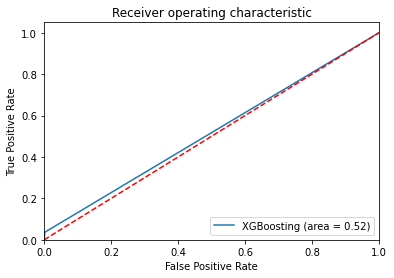

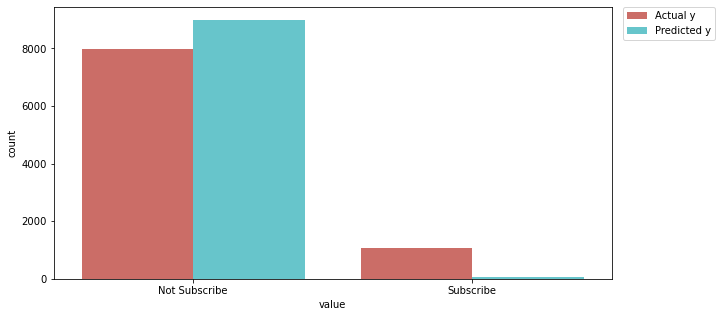

In [77]:
#Accuracy model
print('Accuracy  on eval set: {:.2f}'.format(bestModel.score(X_evals, y_evals)))
print("")

#confussion matrix
print("Confusion Metrics :")
print(confusion_matrix(y_evals, y_eval_fin))
print("")

#Classification report
print("Evaluation report : ")
print(classification_report(y_evals, y_eval_fin))
print("")

#ROC Curve
logit_roc_auc = roc_auc_score(y_evals, y_eval_fin)
print("AUC Score : ", logit_roc_auc)
print("")
fpr, tpr, thresholds = roc_curve(y_evals, y_eval_fin)
plt.figure()
plt.plot(fpr, tpr, label='XGBoosting (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Graph
gr = pd.melt(pd.concat([y_evals['y'], y_eval_fin['pred_y']], axis=1))
plt.figure(figsize=(10,5));
g1 =sns.countplot(data=gr, x="value",  palette="hls", hue="variable")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 , labels=['Actual y', 'Predicted y'])
g1.set_xticklabels(['Not Subscribe', 'Subscribe'])
plt.show()


Based on evaluation above, eventho F1-Score and recall label 1 of our bestModel is worse than previous RandomForest, but it has greater value of precision against label 1 (yes to subsribe the deposit term) which is inline with our previous goals and also same accuracy.

It means, our bestModel has 0.71 (precision against 1) ability to not predict client who subscribe the deposit term as not subscribe it. (False Positive)



### Final Model Random Forest (Pipeline)

Below are our bestModel in form of pipeline end-to-end from preprocess data until train model.

In [78]:
# Define Full Pipeline
full_pipeline_with_predictor = Pipeline([
        ("preparation", PrePipeline),
        ("bestRandomForest", bestModel)
    ])

In [79]:
#Train the pipeline
full_pipeline_with_predictor.fit(train_df, y_trains['y'])

Pipeline(steps=[('preparation',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  <__main__.SelectColumnsCondition object at 0x000001CAAE06FA30>),
                                                                 ('selectcat',
                                                                  <__main__.SelectColumn object at 0x000001CAAE06F880>),
                                                                 ('cat_imp',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('labelenc',
                                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                 unkno...9))])),
                 

We've define our fully pipeline before, let's train it first with train data and then predict our eval set.

In [80]:
#Predict the trained data
y_train_pp = full_pipeline_with_predictor.predict(train_df)

In [81]:
#Predict the eval data
y_eval_pp = pd.DataFrame(full_pipeline_with_predictor.predict(eval_df) , columns=["y_eval_predpp"])
y_eval_pp.head(2)

,y_eval_predpp
0,0
1,0


Below are the evaluation of eval set data using our fully pipeline.

Accuracy  on eval set: 0.89

Confusion Metrics :
[[7968   16]
 [1019   39]]

Evaluation report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7984
           1       0.71      0.04      0.07      1058

    accuracy                           0.89      9042
   macro avg       0.80      0.52      0.50      9042
weighted avg       0.87      0.89      0.84      9042


AUC Score :  0.5174289978823431



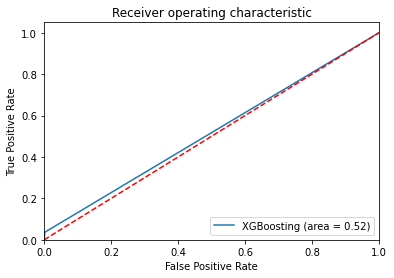

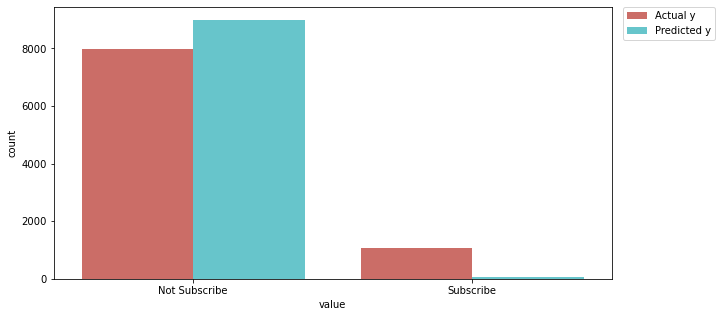

In [82]:
#Accuracy model
print('Accuracy  on eval set: {:.2f}'.format(full_pipeline_with_predictor['bestRandomForest'].score(X_evals, y_evals)))
print("")

#confussion matrix
print("Confusion Metrics :")
print(confusion_matrix(y_evals, y_eval_pp))
print("")

#Classification report
print("Evaluation report : ")
print(classification_report(y_evals, y_eval_pp))
print("")


#ROC Curve
logit_roc_auc1 = roc_auc_score(y_evals, y_eval_pp)
print("AUC Score : ", logit_roc_auc)
print("")
fpr1, tpr1, thresholds1 = roc_curve(y_evals, y_eval_pp)
plt.figure()
plt.plot(fpr1, tpr1, label='XGBoosting (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Graph
gr = pd.melt(pd.concat([y_evals['y'], y_eval_pp["y_eval_predpp"]], axis=1))
plt.figure(figsize=(10,5));
g1 =sns.countplot(data=gr, x="value",  palette="hls", hue="variable")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 , labels=['Actual y', 'Predicted y'])
g1.set_xticklabels(['Not Subscribe', 'Subscribe'])
plt.show()



Comparing evaluation of eval set using BestModel RandomForest Manual, it's same with our BestModel RandomFores pipeline.

## Model Iference

In this section we will use data bank.csv as our sample test , to test predict using our pipeline.

In [84]:
#Load the data sample
sample = pd.read_csv("bank.csv" , sep=";")
sample.shape[0]

4521

In [85]:
#Predict our sample
y_predict = pd.DataFrame(full_pipeline_with_predictor.predict(sample), columns=["y_predicted"])

#Get label from y_predicted
y_predict['y_predicted_l'] = pd.DataFrame(target_en.inverse_transform(y_predict['y_predicted']))
y_predict.head(2)

,y_predicted,y_predicted_l
0,0,no
1,0,no


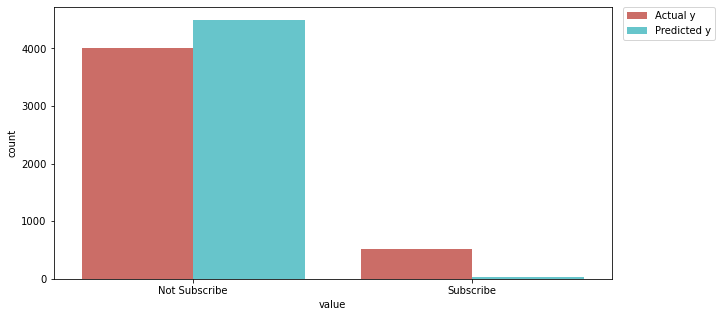

In [86]:
#Compare the true y vs predicted y
gr = pd.melt(pd.concat([sample['y'], y_predict["y_predicted_l"]], axis=1))
plt.figure(figsize=(10,5));
g1 =sns.countplot(data=gr, x="value",  palette="hls", hue="variable")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0 , labels=['Actual y', 'Predicted y'])
g1.set_xticklabels(['Not Subscribe', 'Subscribe'])
plt.show()


We could see, the portion of our predicted y against its actual is same with previous evaluation data.

## Conclusion

Below the conclusion of this notebook, recalling the Goals.
1. We have 12% successfull campaign in dataset. So we could say we have 12% probabilites of success campaign for every campaign.
2. There is no relationship between client's balance against the successfull campaign.
3. Most powerfull media of campaign is via celluler contact.
4. Most powerfull client who accept the campaign is come from Management workers.
5. Most successfull campaign is happening against customer who doesnt have any credit loan or other loan.
6. RandomForest is the best model because, compared to others models, it has high ability to not predict client subscribe deposit term as not subscribe. Eventhough SVC is perfect, but from computation perspective, RandomForest has the fastest and effective one.


## Additional

In this section we will save our bestModel with joblib so we could use it for predict again later.

In [87]:
# Save the model as a pickle in a file
joblib.dump(full_pipeline_with_predictor, 'bestRandomForest_6Sep21.pkl')
 

['bestRandomForest_6Sep21.pkl']

Now we have our trained model in form of .pkl file. We could call this file later when we want to try predict some data.